In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import env
from wrangle import get_log_data, prepd_data, summarize, value_counts_and_frequencies

from datetime import date

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Executive Summary
1. I have been asked to anlyze the curriculum logs for Codeup.
2. The following questions were asked:
    - Lessons with the most activity?
    - Cohort lesson activity?
    - Access by active users, any significance?
    - Topics accessed by Alumni?
    - Least active lessons?
    - Report any other anomalies we may encounter?
3. Key Takeaways
    - One main takeawy in activity across the board showed some users were assigned as to a 'Cohort' then 'Staff' suggesting the student became an employee; possibly or bad data was entered.
    - Time of year had an impact on activity.
    - Increase in activity over the years - growth in activity, classes per year, added programs.

In [57]:
%%HTML
<div class='tableauPlaceholder' id='viz1634921393207' style='position: relative'>
<noscript>
<a href='#'><img alt='Anomly_Detection_Project' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;Anomly_Detection_Project&#47;1_rss.png' style='border: none'/>
</a>
</noscript>
<object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F'/>
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='AnomalyDetectionProject_16348759484050&#47;Anomly_Detection_Project' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;Anomly_Detection_Project&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
<param name='filter' value='publish=yes' />
</object>
</div>
<script type='text/javascript'>
var divElement = document.getElementById('viz1634921393207');
var vizElement = divElement.getElementsByTagName('object')[0];
if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';}
else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';}
else { vizElement.style.width='100%';vizElement.style.height='927px';}
var scriptElement = document.createElement('script');
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

### Plan
1. Acquire and prepare curriculum logs.
2. Analysis based on Anomaly Detection and ran through the data pipeline.
3. A copy of the cleaned dataset is available below.
4. Planning was done via <a href="https://www.w3schools.com">Trello</a>.

# Acquire

In [2]:
df = get_log_data()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


##### I created a dictionary with the class types to merge to the df by 'program id'.

In [3]:
class_type_dict = {'id':[1, 2, 3, 4],
        'Name':['PHP Full Stack Web Development', 
                'Java Full Stack Web Development', 
                'Data Science', 
                'Front End Web Development'],
        'subdomain':['php','java','ds','fe']}
class_type = pd.DataFrame(class_type_dict)
print (class_type)

   id                             Name subdomain
0   1   PHP Full Stack Web Development       php
1   2  Java Full Stack Web Development      java
2   3                     Data Science        ds
3   4        Front End Web Development        fe


In [4]:
#merge df and class_type datasets
df = df.merge(class_type, how='left', left_on='program_id', right_on='id')

In [5]:
df.head()

,date,time,path,user_id,cohort_id,ip,id_x,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,id_y,Name,subdomain
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,2.0,Java Full Stack Web Development,java


In [10]:
summarize(df)

(638186, 11)
___________________________
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 638186 entries, 2018-01-26 09:56:05 to 2021-04-21 16:44:39
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           638186 non-null  int64         
 1   cohort_id         638186 non-null  int64         
 2   ip                638186 non-null  object        
 3   cohort            638186 non-null  object        
 4   class_start_date  638186 non-null  datetime64[ns]
 5   class_end_date    638186 non-null  datetime64[ns]
 6   created_at        638186 non-null  datetime64[ns]
 7   updated_at        638186 non-null  datetime64[ns]
 8   program_id        638186 non-null  int64         
 9   subdomain         638186 non-null  object        
 10  path_2            638186 non-null  object        
dtypes: datetime64[ns](4), int64(3), object(4)
memory usage: 58.4+ MB
None
________________________

In [6]:
#cache dataset for accessibility
df.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/log_data.csv')

##### Key Takeaways

# Prepare

In [7]:
df = prepd_data(df)
df.head()

,user_id,cohort_id,ip,cohort,class_start_date,class_end_date,created_at,updated_at,program_id,subdomain,path_2
date,,,,,,,,,,,
2018-01-26 09:56:05,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,php,object-oriented-programming
2018-01-26 09:56:06,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,php,object_oriented_programming
2018-01-26 09:56:24,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,conditionals
2018-01-26 09:56:41,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,loops
2018-01-26 09:56:46,3,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,conditionals


In [9]:
summarize(df)

(638186, 11)
___________________________
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 638186 entries, 2018-01-26 09:56:05 to 2021-04-21 16:44:39
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           638186 non-null  int64         
 1   cohort_id         638186 non-null  int64         
 2   ip                638186 non-null  object        
 3   cohort            638186 non-null  object        
 4   class_start_date  638186 non-null  datetime64[ns]
 5   class_end_date    638186 non-null  datetime64[ns]
 6   created_at        638186 non-null  datetime64[ns]
 7   updated_at        638186 non-null  datetime64[ns]
 8   program_id        638186 non-null  int64         
 9   subdomain         638186 non-null  object        
 10  path_2            638186 non-null  object        
dtypes: datetime64[ns](4), int64(3), object(4)
memory usage: 58.4+ MB
None
________________________

In [8]:
#cached for accessibility
df.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/log_clean.csv')

##### Key Takeaways

### Exploration on prepared dataset

<AxesSubplot:>

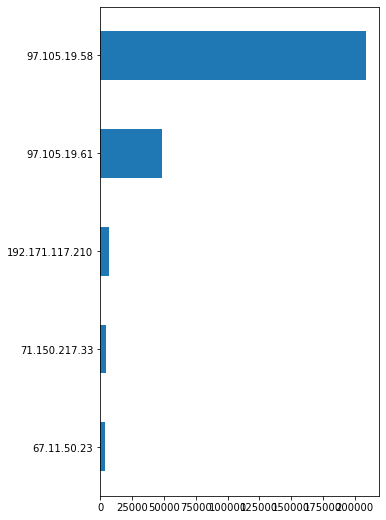

In [44]:
#Counts by ip activity
ip_df = value_counts_and_frequencies(df.ip)
ip_df['count'].sort_values().tail().plot.barh( figsize=(5, 9))

<AxesSubplot:>

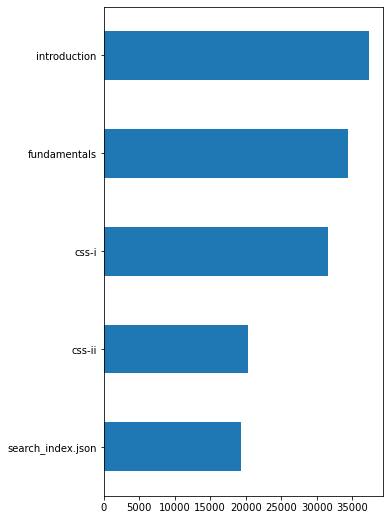

In [12]:
#Counts by lesson
lesson_df = value_counts_and_frequencies(df.path_2)
lesson_df['count'].sort_values().tail().plot.barh(figsize=(5, 9))

<AxesSubplot:>

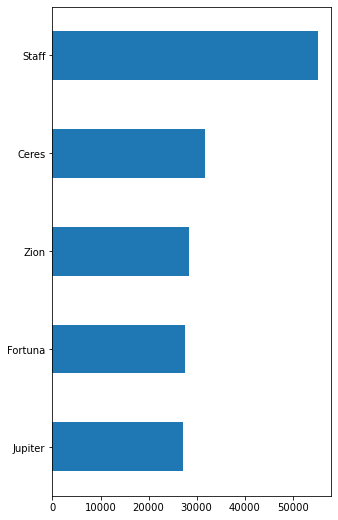

In [49]:
#Counts by Cohort. Staff was mainly ignored.
cohort_df = value_counts_and_frequencies(df.cohort)
cohort_df['count'].sort_values().tail().plot.barh(figsize=(5, 9))

<AxesSubplot:>

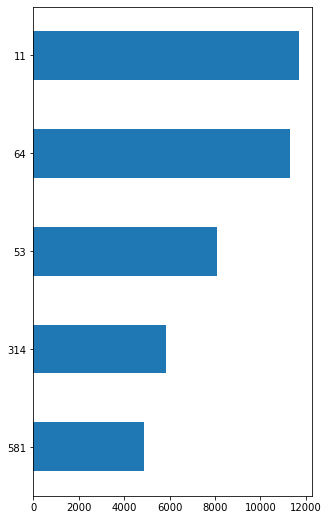

In [14]:
#Most active users
user_df = value_counts_and_frequencies(df.user_id)
user_df['count'].sort_values().tail().plot.barh(figsize=(5, 9))

<AxesSubplot:>

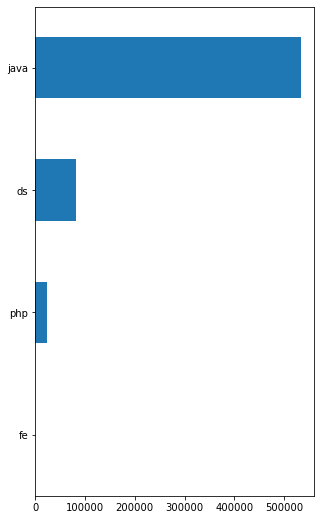

In [56]:
#Most active programs
program_df = value_counts_and_frequencies(df.subdomain)
program_df['count'].sort_values().tail().plot.barh(figsize=(5, 9))

# Explore

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [16]:
lesson_across_cohorts = (df.sort_values('cohort').path_2.value_counts(normalize=True).rename('cohort_count').reset_index())
lesson_across_cohorts.head()

,index,cohort_count
0,introduction,0.058626
1,fundamentals,0.053920
2,css-i,0.049500
3,css-ii,0.031746
4,search_index.json,0.030399


In [17]:
lesson_across_cohorts.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/lesson_across_cohorts.csv')

In [58]:
%%HTML
<div class='tableauPlaceholder' id='viz1634921936585' style='position: relative'><noscript><a href='#'><img alt='Lessons Across Cohort per Program ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;LessonAcrossCohort&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AnomalyDetectionProject_16348759484050&#47;LessonAcrossCohort' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;LessonAcrossCohort&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1634921936585');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### Key Takeaways
1. No real significance.
2. Understandably introduction and fuindamentals were the top two lessons that drove activity.

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [18]:
cohorts_to_lesson = (df.sort_values('path_2').cohort.value_counts().rename('path_count').reset_index())
cohorts_to_lesson.head()

,index,path_count
0,Staff,55287
1,Ceres,31656
2,Zion,28380
3,Fortuna,27505
4,Jupiter,27083


In [19]:
cohorts_to_lesson.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/cohorts_to_lesson.csv')

In [59]:
%%HTML
<div class='tableauPlaceholder' id='viz1634922037420' style='position: relative'><noscript><a href='#'><img alt='Lesson Significant Amongst Cohorts ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;LessonSignificance&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AnomalyDetectionProject_16348759484050&#47;LessonSignificance' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;LessonSignificance&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1634922037420');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### Key Takeaways
1. Lesson significance grouped by chort.
2. No real telling story other then activity.
3. Timeframe has some affect on significance. 
4. Earlier years are less active.

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [20]:
student_activity = (df.sort_values('ip').user_id.value_counts().rename('ip_count').reset_index())
student_activity.tail()

,index,ip_count
883,401,3
884,169,2
885,177,2
886,212,1
887,348,1


In [21]:
student_activity.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/student_activity.csv')

In [60]:
%%HTML
<div class='tableauPlaceholder' id='viz1634922126564' style='position: relative'><noscript><a href='#'><img alt='Usage by User ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;UsagebyUser&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AnomalyDetectionProject_16348759484050&#47;UsagebyUser' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;UsagebyUser&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1634922126564');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### Key Takeaways
1. Nothing significant other than one user with very little activity.
2. Possibilities could include:
    - bad data, leading to filtering during the prep phase
    - Time of year may have something to do with i.e. holidays

4. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [22]:
accessed = (df.sort_values('path_2').user_id.value_counts().rename('p2_count').reset_index())
accessed.head()

,index,p2_count
0,11,11703
1,64,11297
2,53,8107
3,314,5829
4,581,4881


In [23]:
accessed.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/accessed.csv')

In [61]:
%%HTML
<div class='tableauPlaceholder' id='viz1634924104718' style='position: relative'><noscript><a href='#'><img alt='Top 10 User Accessed Topics by Program Passed Graduation Date (Ascending) ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;accessed&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AnomalyDetectionProject_16348759484050&#47;accessed' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;accessed&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1634924104718');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

5. Which lessons are least accessed?

In [24]:
least_accessed = (df.sort_values('path_2').user_id.value_counts().rename('p2_count').reset_index())
least_accessed .tail()

,index,p2_count
883,401,3
884,169,2
885,177,2
886,212,1
887,348,1


#### Selecting a user id bar will filter the Cohort to User Details showing the least accessed Path_2 against usage, subdomain, cohort, number of users.

In [63]:
%%HTML
<div class='tableauPlaceholder' id='viz1634922175021' style='position: relative'><noscript><a href='#'><img alt='User ActivitySelect User Id in the bar grapgh to view corresponding Cohort to User Details ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;UserActivity&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AnomalyDetectionProject_16348759484050&#47;UserActivity' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;An&#47;AnomalyDetectionProject_16348759484050&#47;UserActivity&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1634922175021');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
##### Key Takeaways
1. Nothing significant that stands out. Limited user id attached to activity.
2. Users could have been filtered out during prep.
3. Bad data in - Bad data out.

6. Anything else I should be aware of?
    - Rolling average on usage.

In [25]:
#Resample for a weekly count of activity for an initial look at how activity increase with added classes.
pages = df['ip'].resample('W').count()
pages.plot()

date
2018-01-28     709
2018-02-04    3115
2018-02-11    2310
2018-02-18    2226
2018-02-25    2381
Freq: W-SUN, Name: ip, dtype: int64

<AxesSubplot:xlabel='date'>

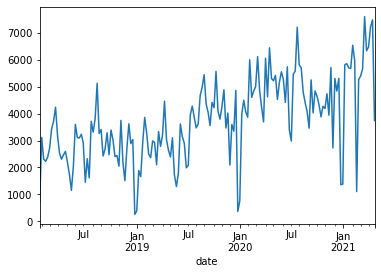

In [27]:
# 7 day EMA
ema_7d = pages.ewm(span=7).mean()
# 14 days EMA
ema_14d = pages.ewm(span=14).mean()
# 30 days EMA
ema_30d = pages.ewm(span=30).mean()
# 90 days EMA
ema_90d = pages.ewm(span=90).mean()

date
2018-01-28     709.000000
2018-02-04    2083.857143
2018-02-11    2181.648649
2018-02-18    2197.868571
2018-02-25    2257.896287
Freq: W-SUN, Name: ip, dtype: float64

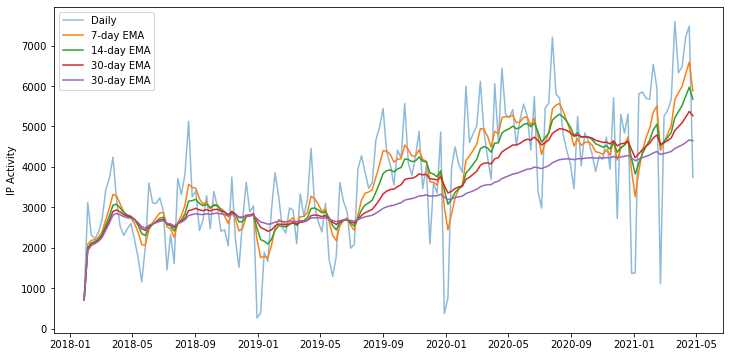

In [31]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '30-day EMA')

ax.legend(loc='best')
ax.set_ylabel('IP Activity')

plt.show()


##### Key Takeaways
1. Increase in usage over the years.
2. New years affects usage.
3. Early 2021 shows a significant drop as well.

### # Bollinger Bands and %b

In [32]:
# set the window span
span = 30
# compute midband
midband = pages.ewm(span=span).mean()
# compute exponential stdev
stdev = pages.ewm(span=span).std()
# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)
bb.columns = ['ub', 'lb']
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['ip_activity', 'midband', 'ub', 'lb']

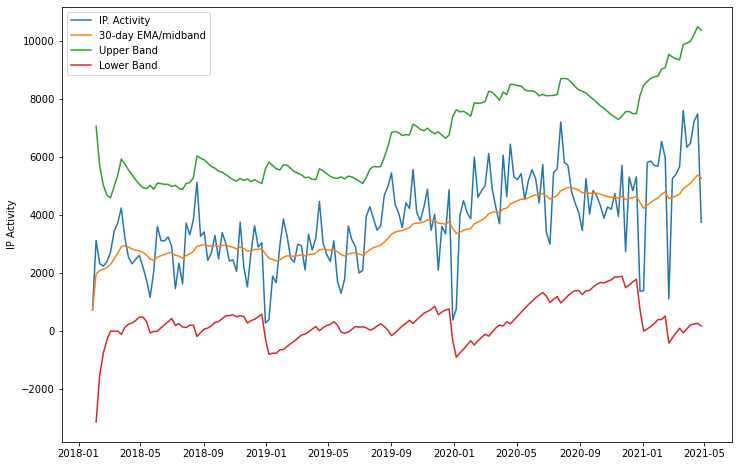

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.ip_activity, label='IP. Activity')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('IP Activity')

plt.show()

##### Key Takeaways
1. Would like to explore lower band anomalies for 2019-01, 2020-01, 2021-01, and early 2021 (Spring).
2. Likely to suggest being the new year has an impact on activity.